# Deep Learning
## HW3

---


## 1. *Import libraries*

In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

## 2. *Load data*

In [2]:
data_csv = pd.read_csv("C:/Users/anjel/Desktop/recurrent_network/Data.csv")
data = data_csv.iloc[:,1:2]
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

## 3. *Training and test data*

In [3]:
x, y = [], []
seq_len = 4
for i in range(len(data)-seq_len-1):
  x.append(np.array(data[i:(i+seq_len)]))
  y.append(np.array(data[i+seq_len]))

train_size = int(len(x) * 0.8)

####################
# YOUR CODE
x_train = x[:train_size]
y_train = y[:train_size]

# Testing set
x_test = x[train_size:]
y_test = y[train_size:]
####################

## 4. *Build the structure of models*

In [4]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch!
        out, _ = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        out = self.fc(out[:, -1, :])
        return out

class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Define the GRU layer
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch!
        out, _ = self.gru(x, h0.detach())

        # Index hidden state of last time step
        out = self.fc(out[:, -1, :])
        return out

## 5. *Train and test the models*






In [7]:
import numpy as np
import torch.optim as optim

input_size = 1
hidden_size = 2
num_layers = 1
output_size = 1

num_epochs = 500
learning_rate = 1e-2

# Instantiate LSTM and GRU models
lstm = LSTM(input_size, hidden_size, num_layers, output_size)
gru = GRU(input_size, hidden_size, num_layers, output_size)

# Define the criterion
criterion = nn.MSELoss()

# Define the optimizers
lstm_optimizer = optim.Adam(lstm.parameters(), lr=learning_rate)
gru_optimizer = optim.Adam(gru.parameters(), lr=learning_rate)

def train_test(model, criterion, optimizer, x_train, y_train, x_test, y_test, num_epochs, learning_rate):
    epochs = np.zeros(num_epochs)
    train_losses = np.zeros(num_epochs)
    test_losses = np.zeros(num_epochs)

    for epoch in range(num_epochs):
        # Train the model
        model.train()
        optimizer.zero_grad()
        
        x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
        
        # Forward pass
        outputs = model(x_train_tensor)
        train_loss = criterion(outputs, y_train_tensor)
        
        # Backward pass and optimization
        train_loss.backward()
        optimizer.step()
        
        train_losses[epoch] = train_loss.item()

        # Test the model
        model.eval()
        
        x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

        with torch.no_grad():
            test_outputs = model(x_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
            test_losses[epoch] = test_loss.item()

        print('Epoch: {0}, Train_loss: {1:.5f}, Test_loss: {2:.5f}'.format(epoch+1, train_losses[epoch], test_losses[epoch]))

    return epochs, train_losses, test_losses

# Assuming you have x_train, y_train, x_test, y_test
epochs_lstm, train_losses_lstm, test_losses_lstm = train_test(lstm, criterion, lstm_optimizer, x_train, y_train, x_test, y_test, num_epochs, learning_rate)
epochs_gru, train_losses_gru, test_losses_gru = train_test(gru, criterion, gru_optimizer, x_train, y_train, x_test, y_test, num_epochs, learning_rate)


Epoch: 1, Train_loss: 0.77413, Test_loss: 1.55793
Epoch: 2, Train_loss: 0.74778, Test_loss: 1.51853
Epoch: 3, Train_loss: 0.72269, Test_loss: 1.48090
Epoch: 4, Train_loss: 0.69879, Test_loss: 1.44495
Epoch: 5, Train_loss: 0.67603, Test_loss: 1.41059
Epoch: 6, Train_loss: 0.65432, Test_loss: 1.37774
Epoch: 7, Train_loss: 0.63362, Test_loss: 1.34629
Epoch: 8, Train_loss: 0.61384, Test_loss: 1.31614
Epoch: 9, Train_loss: 0.59492, Test_loss: 1.28722
Epoch: 10, Train_loss: 0.57680, Test_loss: 1.25941
Epoch: 11, Train_loss: 0.55941, Test_loss: 1.23263
Epoch: 12, Train_loss: 0.54271, Test_loss: 1.20680
Epoch: 13, Train_loss: 0.52663, Test_loss: 1.18184
Epoch: 14, Train_loss: 0.51114, Test_loss: 1.15768
Epoch: 15, Train_loss: 0.49618, Test_loss: 1.13426
Epoch: 16, Train_loss: 0.48170, Test_loss: 1.11150
Epoch: 17, Train_loss: 0.46769, Test_loss: 1.08936
Epoch: 18, Train_loss: 0.45410, Test_loss: 1.06779
Epoch: 19, Train_loss: 0.44090, Test_loss: 1.04673
Epoch: 20, Train_loss: 0.42806, Test_los

In [ ]:
lstm_epochs, lstm_train_losses, lstm_test_losses = train_test(lstm, criterion, lstm_optimizer, x_train, y_train, num_epochs, learning_rate)

[Text(-0.06, 0, ''),
 Text(-0.039999999999999994, 0, ''),
 Text(-0.019999999999999997, 0, ''),
 Text(0.0, 0, ''),
 Text(0.020000000000000004, 0, ''),
 Text(0.04000000000000001, 0, ''),
 Text(0.06, 0, '')]

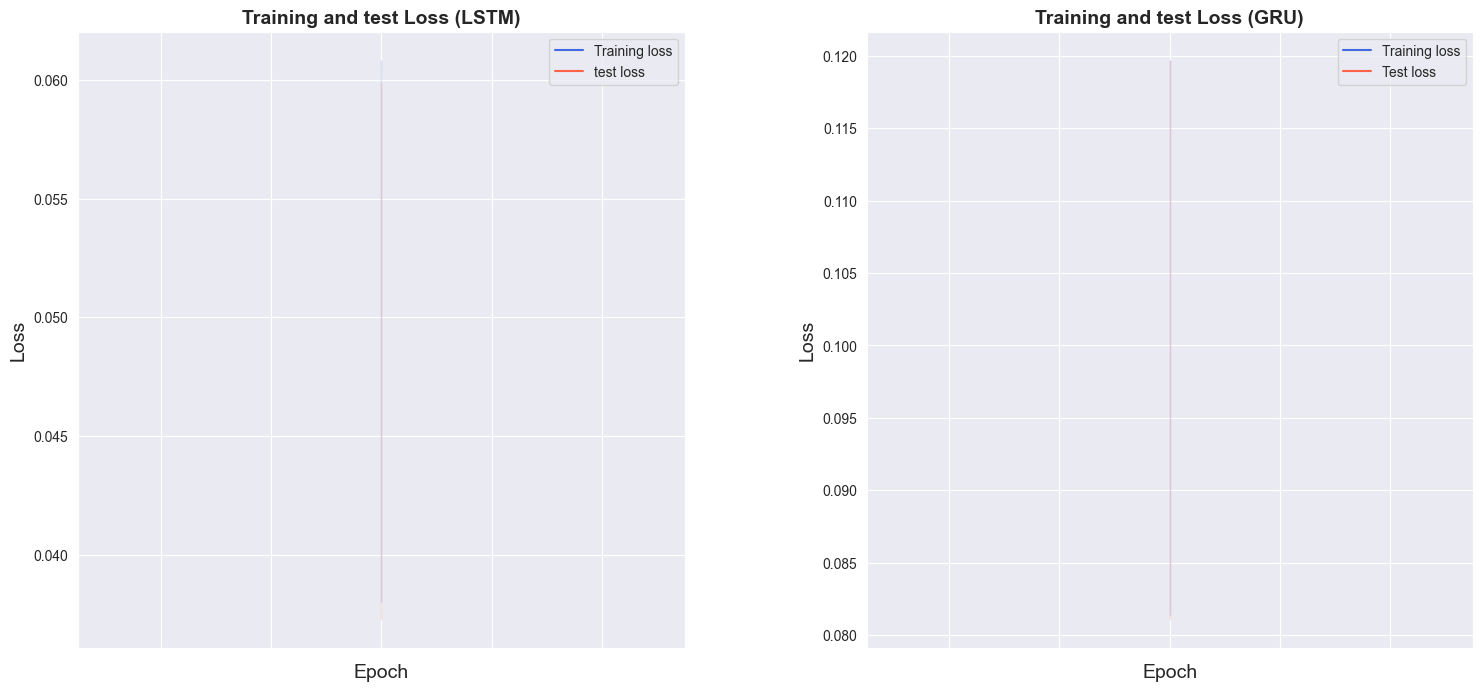

In [16]:
sns.set_style("darkgrid")    

fig = plt.figure(figsize=(18,8))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = epochs_lstm, y = train_losses_lstm, label="Training loss", color="royalblue")
ax = sns.lineplot(x = epochs_lstm, y = train_losses_lstm, label="test loss", color="tomato")
ax.set_title("Training and test Loss (LSTM)", size = 14, fontweight="bold")
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_xticklabels('', size=10)

plt.subplot(1, 2, 2)
ax = sns.lineplot(x = epochs_gru, y = test_losses_gru, label="Training loss", color="royalblue")
ax = sns.lineplot(x = epochs_gru, y = test_losses_gru, label="Test loss", color="tomato")
ax.set_title("Training and test Loss (GRU)", size = 14, fontweight="bold")
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_xticklabels('', size=10)

### 7. *Make predictions*

In [17]:
x_data = torch.Tensor(np.array(x))
y_data = torch.Tensor(np.array(y))

y_data = pd.DataFrame(scaler.inverse_transform(y_data.detach().numpy()))

lstm_data_predict = lstm(x_data).detach().numpy()
gru_data_predict = gru(x_data).detach().numpy()

lstm_data_predict = pd.DataFrame(scaler.inverse_transform(lstm_data_predict))
gru_data_predict = pd.DataFrame(scaler.inverse_transform(gru_data_predict))

## 8. *Compare LSTM and GRU prediction results*

[Text(-20.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, ''),
 Text(60.0, 0, ''),
 Text(80.0, 0, ''),
 Text(100.0, 0, ''),
 Text(120.0, 0, ''),
 Text(140.0, 0, ''),
 Text(160.0, 0, '')]

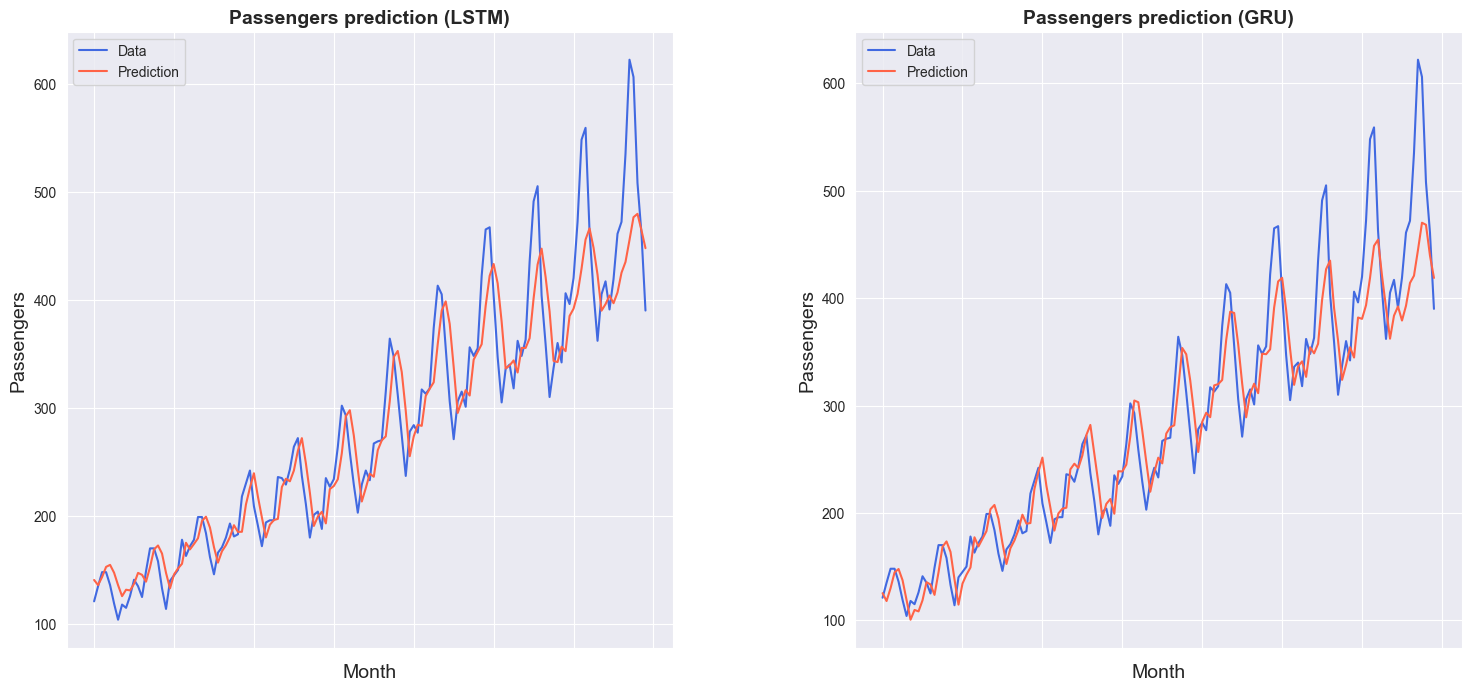

In [18]:
sns.set_style("darkgrid")    

fig = plt.figure(figsize=(18,8))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = y_data.index, y = y_data[0], label="Data", color="royalblue")
ax = sns.lineplot(x = lstm_data_predict.index, y = lstm_data_predict[0], label="Prediction", color="tomato")
ax.set_title("Passengers prediction (LSTM)", size = 14, fontweight="bold")
ax.set_xlabel("Month", size = 14)
ax.set_ylabel("Passengers", size = 14)
ax.set_xticklabels('', size=10)

plt.subplot(1, 2, 2)
ax = sns.lineplot(x = y_data.index, y = y_data[0], label="Data", color="royalblue")
ax = sns.lineplot(x = gru_data_predict.index, y = gru_data_predict[0], label="Prediction", color="tomato")
ax.set_title("Passengers prediction (GRU)", size = 14, fontweight="bold")
ax.set_xlabel("Month", size = 14)
ax.set_ylabel("Passengers", size = 14)
ax.set_xticklabels('', size=10)